Q1

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
P1=torch.normal(0.0, 1.0,size=[5000,2])
P2=torch.normal(3.0, 1.0,size=[5000,2])
P1.type()

'torch.FloatTensor'

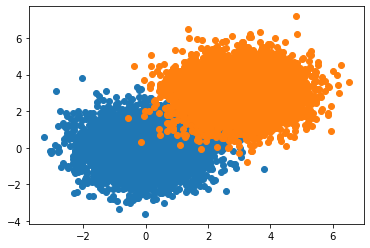

In [3]:
plt.scatter(P1[:,0], P1[:,1])
plt.scatter(P2[:,0], P2[:,1])

[-1.1958170972703055, 3.7411927459403396]


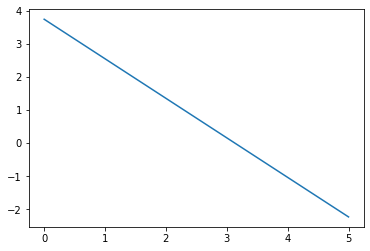

In [4]:
gamma = 0.01
w = [random.uniform(-0.8, -1.2), random.uniform(2, 4)]
x = np.linspace(0,5,100)
plt.plot(x, w[0]*x + w[1])
print(w)

In [5]:
dset1 = []
dset2 = []
dset1size = 0
for i in P1:
  if (w[0]*i[0] - i[1] + w[1])/np.sqrt(w[0]**2 + w[1]**2) >= gamma:
    i = np.array(i)
    dset1.append(i)
    dset1size += 1
  if dset1size == 1000:
    break


In [6]:
dset2size = 0
for i in P2:
  if np.abs((w[0]*i[0] - i[1] + w[1])/np.sqrt(w[0]**2 + w[1]**2)) >= gamma and (w[0]*i[0] - i[1] + w[1])/np.sqrt(w[0]**2 + w[1]**2) <= 0:
    i = np.array(i)
    dset2.append(i)
    dset2size += 1
  if dset2size == 1000:
    break

print(len(dset2))
print(len(dset1))

1000
1000


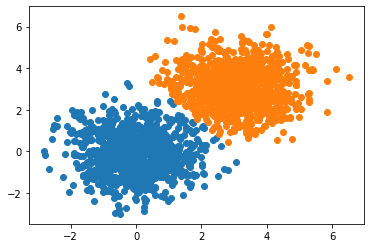

In [7]:
dset1 = np.array(dset1)
dset2 = np.array(dset2)

plt.scatter(dset1[:,0], dset1[:,1])
plt.scatter(dset2[:,0], dset2[:,1])

In [8]:
def train_perceptron(x, y, w):  
  iter = 0
  boo = True
  while(boo):
    iter += 1
    nb_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    #print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
    if nb_changes == 0:
        boo = False;
  print('Number of iterations: %d'%iter)  # prints the number of chages in the end  
  return w

In [9]:
ans = torch.Tensor([0, 0, 0])
dset1 = torch.from_numpy(dset1)
dset2 = torch.from_numpy(dset2)

dset = torch.empty(2000, dset1.size(1)+1).fill_(1)
dset[::2, :2] = dset1
dset[1::2, :2] = dset2

dlabels = torch.empty(2000, 1)
dlabels[::2, :2] = -1.0
dlabels[1::2, :2] = 1.0
ans = train_perceptron(dset, dlabels, ans)

Number of iterations: 7


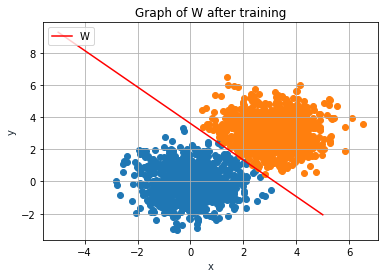

tensor([  7.2397,   6.3840, -23.0000])


In [10]:
x = np.linspace(-5,5,100)
y = -(ans[0].item()/ans[1].item())*x - (ans[2].item()/ans[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(dset1[:,0], dset1[:,1])
plt.scatter(dset2[:,0], dset2[:,1])
plt.grid()
plt.show()
print(ans)

Q2

In [11]:
ans = torch.Tensor([0, 0, 0])
threshold = 1000
prevloss = -1000
alpha = 1
iter = 0
while threshold > 1:
  iter += 1
  loss = 0
  grad = torch.Tensor([0, 0, 0])
  for i in range(2000):
    temp = 1 - dlabels[i]*(ans.dot(dset[i]))
    if temp > 0:
      loss += temp
      tem = torch.Tensor(3*[dlabels[i]])
      grad += torch.Tensor([1, 1, 1]) - tem*dset[i]
      #torch.Tensor([dlabels[i]*dset[i][0], dlabels[i]*dset[i][1], dlabels[i]*dset[i][2]])
  threshold = abs(loss - prevloss)
  print(threshold)
  grad = grad / dlabels.size()[0]
  prevloss = loss
  ans = ans - alpha * grad
print(iter)
#print(ans)

tensor([3000.])
tensor([1720.8694])
tensor([987.2128])
tensor([890.8539])
tensor([219.8613])
tensor([79.8164])
tensor([30.5811])
tensor([14.5578])
tensor([3.1802])
tensor([7.8838])
tensor([3.1397])
tensor([2.9518])
tensor([3.5927])
tensor([2.3045])
tensor([3.1626])
tensor([1.6140])
tensor([1.5098])
tensor([0.3496])
18


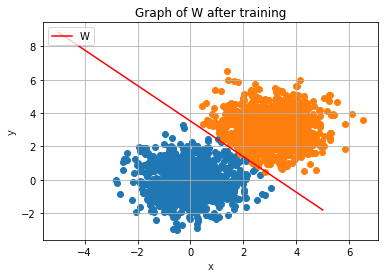

tensor([ 0.8792,  0.8246, -2.9030])


In [12]:
x = np.linspace(-5,5,100)
y = -(ans[0].item()/ans[1].item())*x - (ans[2].item()/ans[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(dset1[:,0], dset1[:,1])
plt.scatter(dset2[:,0], dset2[:,1])
plt.grid()
plt.show()
print(ans)

Q3

In [131]:
r1 = 3
r2 = 5

d1 = []
#d1 = np.array(500 * [np.array([random.random(), random.random()])])
for i in range(500):
  temp = np.array([random.uniform(-1, 1), random.uniform(-1, 1)])
  temp = r1 * temp / (np.sqrt(temp[0]**2 + temp[1]**2))
  d1.append(temp)

d1 = np.array(d1)
d2 = []
for i in range(500):
  temp = np.array([random.uniform(-1, 1), random.uniform(-1, 1)])
  temp = r2 * temp / (np.sqrt(temp[0]**2 + temp[1]**2))
  d2.append(temp)

d2 = np.array(d2)


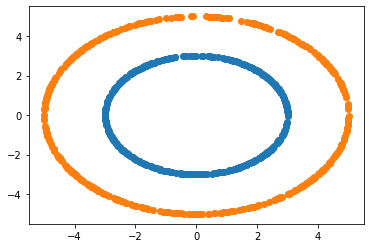

In [132]:
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])

In [133]:
w1 = torch.rand(3, 3)
w2 = torch.rand(3,1)
b1 = torch.rand(1, 3)
b2 = torch.rand(1,1)
d1 = torch.from_numpy(d1)
d2 = torch.from_numpy(d2)
d = torch.empty(1000, d1.size(1)+1).fill_(1)
d[::2, :2] = d1
d[1::2, :2] = d2

dl = torch.empty(1000, 1)
dl[::2, :2] = -1.0
dl[1::2, :2] = 1.0
#print(dl)

In [134]:
def Sigmoder(x):
  return x*(1-x)

def tanh(x):
  return np.tanh(x)

def tanhh(x):
  return 1 - (np.tanh(x)**2)


In [135]:
def MLP(X,Y,W1,W2,b1, b2):

  net = 0.1
  iter = 0

  while iter<5000:
    iter+=1

    #forwardpass 
    # print(W2.shape,"w2")

    x1 = torch.matmul(X,W1) + b1
    # print(x1.shape, "x1.shape")

    acx1 = tanh(x1)
    # print(acx1.shape, "acx1.shape")
    # onee = torch.ones(1000, 1)
    # acx1 = torch.cat((acx1, onee), 1)

    x2 = torch.matmul(acx1,W2)+b2
    # print(x2.shape,"x2.shape")

    acx2 = tanh(x2)
    # print(acx2.shape, "acx2 shape")

    #loss = Loss(Y,acx2)


    #backprop
    # print(Y.shape)
    dz2 = (acx2 -Y)
    # print(dz2.shape, "dz2 shape")

    dw2 = torch.matmul(acx1.T,dz2)/(X.size(0))
    db2 = torch.sum(dz2)/(X.size(0))

    # print(dw2.shape, " dw2 shape")

    dz1 = torch.matmul(dz2,W2.T)*tanhh(acx1)
    # print(dz1.shape, " dz1 shape")

    dw1 = torch.matmul(X.T,dz1)/X.size(0)
    # print(dw1.shape, " dw1 shape")
    db1 = torch.sum(dz1, axis=0)/(X.size(0))


    #updations
    W2 = W2 - net*(dw2)
    W1 = W1 - net*dw1
    b2 = b2 - net*db2
    b1 = b1 - net*db1
  # print(iter)

  return W1,W2,b1, b2



In [136]:
MLP(d,dl,w1,w2,b1, b2)

(tensor([[ 0.3419, -0.4570,  0.1302],
         [ 0.3697,  0.1207, -0.4237],
         [ 0.5880,  0.2712,  0.4366]]), tensor([[-4.7939],
         [-4.8466],
         [-4.8774]]), tensor([[0.7689, 0.9685, 0.6912]]), tensor([[7.1784]]))

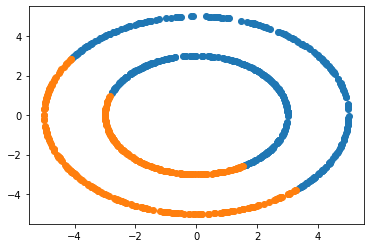

In [138]:
# CALCULATING ACTIVATION 
fig1 = []
fig2 = []

for i in d:
  x1 = torch.matmul(i,w1) + b1
  acx1 = tanh(x1)
      # print(acx1.shape, "acx1.shape")
      # onee = torch.ones(1000, 1)
      # acx1 = torch.cat((acx1, onee), 1)

  x2 = torch.matmul(acx1,w2) + b2
  #print(x2.shape,"x2.shape")

  acx2 = tanh(x2)
  if acx2 > 0.5:
    fig1.append([i[0], i[1]])
  else:
    fig2.append([i[0], i[1]])


# print(acx2)

# print(dl[315])
# x1 = torch.matmul(d[347],w1)
# #print(x1.shape, "x1.shape")

# acx1 = 1/(1+torch.exp(-x1))
#     # print(acx1.shape, "acx1.shape")
#     # onee = torch.ones(1000, 1)
#     # acx1 = torch.cat((acx1, onee), 1)

# x2 = torch.matmul(acx1,w2)+b
# print(x2.shape,"x2.shape")

# acx2 = 1/(1+torch.exp(-x2))

# print(acx2)
# print(dl[147])



